<a href="https://colab.research.google.com/github/npto04/PySpark-pandas-challenge/blob/main/PYSPARK_SQL_Ney_Oliveira_Projeto_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO INDIVIDUAL

* Deverá ser montada a estrutura do DataFrame utilizando o StructType.
* Verificar a existência de dados inconsistentes, nulos e realizar a limpeza.
* Verificar a necessidade de drop em colunas ou linhas. Caso seja necessário, fazer comentário do porque.
* Realizar a mudança de nome de pelo menos 2 colunas
* Deverá criar pelo menos duas novas colunas contendo alguma informação relevante sobre as outras colunas já existentes (Funções de Agrupamento, Agregação ou Joins). (Use a sua capacidade analítica)
* Deverá utilizar filtros, ordenação e agrupamento, trazendo dados relevantes para o negócio em questão. (Use a sua capacidade analítica)
* Utilizar pelo menos duas Window Functions




# INSTALAÇÕES

In [ ]:
!pip install -q pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 42.1 MB/s 


# IMPORTAÇÕES

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql import functions as F
from pyspark.sql.types import *
from google.colab import drive
from pyspark.sql.window import Window

# CRIANDO SESSÃO

## Caminho do Google Cloud Storage conector



Deve ser baixado para rodar e atualizar caminho:
[Download](https://cloud.google.com/dataproc/docs/concepts/connectors/cloud-storage)

In [ ]:
gcs_conector = 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop3-latest.jar'

## Autenticação

Antes de começar é preciso ter um JSON arquivo de chave para o conector poder se autenticar com Google Cloud Storage. Clique aqui para entender ou aqui para como obter esse JSON.

Após eu ter adquirido o JSON, eu pude configurar o framework (PySpark no caso) para usar o GCS connector quando acessando dados no Google Cloud Storage.

In [ ]:
drive.mount('/content/drive')
serviceAccount = "/content/drive/MyDrive/credentials/ney-oliveira-proj-individual-9e7fc090bd42.json"

Mounted at /content/drive


## Sessão

In [ ]:
spark = (SparkSession.builder
        .master("local[*]")
        .appName("projeto-individual")
        .config('spark.ui.port', '4050')
        .config('spark.jars', gcs_conector)
        .config('spark.hadoop.fs.gs.impl','com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem')
        .config('spark.hadoop.fs.gs.auth.service.account.enable', 'true')
        .config("google.cloud.auth.service.account.json.keyfile",serviceAccount)
        .getOrCreate())

In [ ]:
spark

# Extrair base de dados do Google Cloud Storage

## Caminho do CSV no GCS

In [ ]:
caminho = 'gs://ney-oliveira-proj-individual/arquivos-tratados/marketing_campaign.csv'

## Criando esquema

In [ ]:
esquema = (
    StructType([
        StructField("ID",IntegerType()),
        StructField("AnoNascimento", IntegerType()),
        StructField("Educacao", StringType()),
        StructField("EstadoCivil", StringType()),
        StructField("Renda", FloatType()),
        StructField("CriancasSobTutela", IntegerType()),
        StructField("AdolescenteSobTutela", IntegerType()),
        StructField("DataCadastro", DateType()),
        StructField("DiasDesdeUltimaCompra", IntegerType()),
        StructField("Gasto_Vinho", IntegerType()),
        StructField("Gasto_Frutas", IntegerType()),
        StructField("Gasto_Carnes", IntegerType()),
        StructField("Gasto_Peixes", IntegerType()),
        StructField("Gasto_Doces", IntegerType()),
        StructField("Gasto_Ouro", IntegerType()),
        StructField("NumComprasComDesconto", IntegerType()),
        StructField("NumComprasOnline", IntegerType()),
        StructField("NumComprasCatalogo", IntegerType()),
        StructField("NumComprasLoja", IntegerType()),
        StructField("NumVisitasSite", IntegerType()),
        StructField("AceitouCampanha3", BooleanType()),
        StructField("AceitouCampanha4", BooleanType()),
        StructField("AceitouCampanha5", BooleanType()),
        StructField("AceitouCampanha1", BooleanType()),
        StructField("AceitouCampanha2", BooleanType()),
        StructField("Reclamou", BooleanType()),
        StructField("AceitouUltimaCampanha", BooleanType()),
    ])
)

## Extraindo dados com esquema para um DataFrame do PySpark

In [ ]:
df = (
    spark
       .read
       .format("csv")
       .option("header", "true")
       .option("delimiter", ",")
       .load(caminho,schema=esquema)
)

In [ ]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- AnoNascimento: integer (nullable = true)
 |-- Educacao: string (nullable = true)
 |-- EstadoCivil: string (nullable = true)
 |-- Renda: float (nullable = true)
 |-- CriancasSobTutela: integer (nullable = true)
 |-- AdolescenteSobTutela: integer (nullable = true)
 |-- DataCadastro: date (nullable = true)
 |-- DiasDesdeUltimaCompra: integer (nullable = true)
 |-- Gasto_Vinho: integer (nullable = true)
 |-- Gasto_Frutas: integer (nullable = true)
 |-- Gasto_Carnes: integer (nullable = true)
 |-- Gasto_Peixes: integer (nullable = true)
 |-- Gasto_Doces: integer (nullable = true)
 |-- Gasto_Ouro: integer (nullable = true)
 |-- NumComprasComDesconto: integer (nullable = true)
 |-- NumComprasOnline: integer (nullable = true)
 |-- NumComprasCatalogo: integer (nullable = true)
 |-- NumComprasLoja: integer (nullable = true)
 |-- NumVisitasSite: integer (nullable = true)
 |-- AceitouCampanha3: boolean (nullable = true)
 |-- AceitouCampanha4: boolean (n

# Pré-análise de dados

## Verificando a existência de dados inconsistentes, nulos

In [ ]:
df.show()

+----+-------------+-------------+-------------+-------+-----------------+--------------------+------------+---------------------+-----------+------------+------------+------------+-----------+----------+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+
|  ID|AnoNascimento|     Educacao|  EstadoCivil|  Renda|CriancasSobTutela|AdolescenteSobTutela|DataCadastro|DiasDesdeUltimaCompra|Gasto_Vinho|Gasto_Frutas|Gasto_Carnes|Gasto_Peixes|Gasto_Doces|Gasto_Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|
+----+-------------+-------------+-------------+-------+-----------------+--------------------+------------+---------------------+-----------+------------+------------+------------+-

In [ ]:
df.describe().show()

+-------+------------------+------------------+--------+-----------+-----------------+-------------------+--------------------+---------------------+------------------+------------------+-----------------+------------------+-----------------+----------------+---------------------+------------------+------------------+-----------------+-----------------+
|summary|                ID|     AnoNascimento|Educacao|EstadoCivil|            Renda|  CriancasSobTutela|AdolescenteSobTutela|DiasDesdeUltimaCompra|       Gasto_Vinho|      Gasto_Frutas|     Gasto_Carnes|      Gasto_Peixes|      Gasto_Doces|      Gasto_Ouro|NumComprasComDesconto|  NumComprasOnline|NumComprasCatalogo|   NumComprasLoja|   NumVisitasSite|
+-------+------------------+------------------+--------+-----------+-----------------+-------------------+--------------------+---------------------+------------------+------------------+-----------------+------------------+-----------------+----------------+---------------------+-------

Achar onde e quantos valores `null` existem

In [ ]:
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------------+--------+-----------+-----+-----------------+--------------------+------------+---------------------+-----------+------------+------------+------------+-----------+----------+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+
| ID|AnoNascimento|Educacao|EstadoCivil|Renda|CriancasSobTutela|AdolescenteSobTutela|DataCadastro|DiasDesdeUltimaCompra|Gasto_Vinho|Gasto_Frutas|Gasto_Carnes|Gasto_Peixes|Gasto_Doces|Gasto_Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|
+---+-------------+--------+-----------+-----+-----------------+--------------------+------------+---------------------+-----------+------------+------------+------------+-----------+----------+--------

Achar valores distintos em todas as colunas

In [ ]:
df.select([F.countDistinct(c).alias(c) for c in df.columns]).show()

+----+-------------+--------+-----------+-----+-----------------+--------------------+------------+---------------------+-----------+------------+------------+------------+-----------+----------+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+
|  ID|AnoNascimento|Educacao|EstadoCivil|Renda|CriancasSobTutela|AdolescenteSobTutela|DataCadastro|DiasDesdeUltimaCompra|Gasto_Vinho|Gasto_Frutas|Gasto_Carnes|Gasto_Peixes|Gasto_Doces|Gasto_Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|
+----+-------------+--------+-----------+-----+-----------------+--------------------+------------+---------------------+-----------+------------+------------+------------+-----------+----------+-----

## Realizar a mudança de nome de colunas por economicidade 

In [ ]:
df = (df.withColumnRenamed("Gasto_Vinho","Vinho")
    .withColumnRenamed("Gasto_Frutas","Frutas")
    .withColumnRenamed("Gasto_Carnes", "Carnes")
    .withColumnRenamed("Gasto_Peixes", "Peixes")
    .withColumnRenamed("Gasto_Doces", "Doces")
    .withColumnRenamed("Gasto_Ouro", "Ouro")
    )

# Tratamento de Dados

In [ ]:
df.show()

+----+-------------+-------------+-------------+-------+-----------------+--------------------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+
|  ID|AnoNascimento|     Educacao|  EstadoCivil|  Renda|CriancasSobTutela|AdolescenteSobTutela|DataCadastro|DiasDesdeUltimaCompra|Vinho|Frutas|Carnes|Peixes|Doces|Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|
+----+-------------+-------------+-------------+-------+-----------------+--------------------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+-------------

## Criar coluna familia

Agrupar `CriancasSobTutela` e `AdolescenteSobTutela` sob o mesmo grupo e adicionar cônjuge se houver `EstadoCivil` e dropar-las 

In [ ]:
[x.EstadoCivil for x in df.select('EstadoCivil').distinct().collect()]

['Viúvo', 'Divorciado', 'Solteiro', 'Casado', 'União Estável']

Adiciona conjuge quando EstadoCivil for Casado ou União Estavel

In [ ]:
casais = ['Casado', 'União Estável']
df = (df.withColumn("Familia", F.when(F.col("EstadoCivil").isin(casais), F.col('AdolescenteSobTutela')+F.col('CriancasSobTutela')+2)
                    .otherwise(1+F.col('AdolescenteSobTutela')+F.col('CriancasSobTutela'))))

Dropando os reduntantes

In [ ]:
df = df.drop("CriancasSobTutela","AdolescenteSobTutela", "EstadoCivil")

In [ ]:
df.show()

+----+-------------+-------------+-------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+-------+
|  ID|AnoNascimento|     Educacao|  Renda|DataCadastro|DiasDesdeUltimaCompra|Vinho|Frutas|Carnes|Peixes|Doces|Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|Familia|
+----+-------------+-------------+-------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+-------+
|5524|         1

## Criar faixa de total gasto

Criando nova coluna com todos os somando as colunas Vinho|Frutas|Carnes|Peixes|Doces|Ouro

In [ ]:
df = df.withColumn("Total_Gasto", F.col('Vinho')+F.col('Frutas')+F.col('Carnes')+F.col('Peixes')+F.col('Doces')+F.col('Ouro'))

In [ ]:
df = (df.withColumn("Faixa_total_gasto", 
        F.when((F.col('Total_Gasto') >= 0) & (F.col('Total_Gasto') <= 100), F.lit('Entre 0 e 100'))
          .when((F.col('Total_Gasto') > 100) & (F.col('Total_Gasto') <= 500), F.lit('Entre 101 e 500'))
          .when((F.col('Total_Gasto') > 500) & (F.col('Total_Gasto') <= 1000), F.lit('Entre 501 e 1000'))
          .when((F.col('Total_Gasto') > 1000) & (F.col('Total_Gasto') <= 1500), F.lit('Entre 1001 e 1500'))
          .when((F.col('Total_Gasto') > 1500) & (F.col('Total_Gasto') <= 2000), F.lit('Entre 1501 e 2000'))
        .otherwise('Maior que 2000')))

## Faixa de renda

In [ ]:
df = (df.withColumn("Faixa_de_rendas", 
        F.when((F.col('Renda') >= 0) & (F.col('Renda') <= 5000), F.lit('1-Entre 0 e 5000'))
          .when((F.col('Renda') > 5000) & (F.col('Renda') <= 10000), F.lit('2-Entre 5001 e 10000'))
          .when((F.col('Renda') > 10000) & (F.col('Renda') <= 25000), F.lit('3-Entre 10001 e 25000'))
          .when((F.col('Renda') > 25000) & (F.col('Renda') <= 50000), F.lit('4-Entre 25001 e 50000'))
          .when((F.col('Renda') > 50000) & (F.col('Renda') <= 100000), F.lit('5-Entre 50001 e 100000'))
        .otherwise('6-Maior que 100000')))

## Criar faixa de idades

In [ ]:
df = (df.withColumn('idade', F.date_format(F.current_date(), "yyyy").cast('int') - F.col('AnoNascimento'))
.withColumn("Faixa_idade", 
        F.when((F.col('idade') >= 0) & (F.col('idade') <= 30), F.lit('Entre 0 e 30'))
          .when((F.col('idade') > 30) & (F.col('idade') <= 45), F.lit('Entre 31 e 45'))
          .when((F.col('idade') > 45) & (F.col('idade') <= 60), F.lit('Entre 46 e 60'))
          .when((F.col('idade') > 60) & (F.col('idade') <= 75), F.lit('Entre 60 e 75'))
          .when((F.col('idade') > 75) & (F.col('idade') <= 90), F.lit('Entre 75 e 90'))
        .otherwise('Maior que 90')))

## Criar faixa de ano de nascimento

In [ ]:
df = (df.withColumn("Faixas_ano_nascimento", 
        F.when((F.col('AnoNascimento') >= 0) & (F.col('AnoNascimento') <= 1920), F.lit('Antes de 1920'))
          .when((F.col('AnoNascimento') > 1920) & (F.col('AnoNascimento') <= 1940), F.lit('Entre 1921 e 1940'))
          .when((F.col('AnoNascimento') > 1940) & (F.col('AnoNascimento') <= 1960), F.lit('Entre 1941 e 1960'))
          .when((F.col('AnoNascimento') > 1960) & (F.col('AnoNascimento') <= 1980), F.lit('Entre 1961 e 1980'))
          .when((F.col('AnoNascimento') > 1980) & (F.col('AnoNascimento') <= 2000), F.lit('Entre 1981 e 2000'))
        .otherwise('Depois de 2000')))

## Criar quantidade de compras
NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja

In [ ]:
df = (df.withColumn('QTD_COMPRAS', F.col('NumComprasComDesconto')+F.col('NumComprasOnline')+F.col('NumComprasCatalogo')+F.col('NumComprasLoja'))
)

In [ ]:
df = (df.withColumn("Faixa_qtd_compras", 
        F.when((F.col('QTD_COMPRAS') >= 0) & (F.col('QTD_COMPRAS') <= 8), F.lit('Entre 00 e 08'))
          .when((F.col('QTD_COMPRAS') > 8) & (F.col('QTD_COMPRAS') <= 16), F.lit('Entre 09 e 16'))
          .when((F.col('QTD_COMPRAS') > 16) & (F.col('QTD_COMPRAS') <= 24), F.lit('Entre 17 e 24'))
          .when((F.col('QTD_COMPRAS') > 24) & (F.col('QTD_COMPRAS') <= 32), F.lit('Entre 25 e 32'))
          .when((F.col('QTD_COMPRAS') > 32) & (F.col('QTD_COMPRAS') <= 40), F.lit('Entre 33 e 40'))
        .otherwise('Maior que 40')))

# Agrupamentos

In [ ]:
df.show()

+----+-------------+-------------+-------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+-------+-----------+-----------------+--------------------+-----+-------------+---------------------+-----------+-----------------+
|  ID|AnoNascimento|     Educacao|  Renda|DataCadastro|DiasDesdeUltimaCompra|Vinho|Frutas|Carnes|Peixes|Doces|Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|Familia|Total_Gasto|Faixa_total_gasto|     Faixa_de_rendas|idade|  Faixa_idade|Faixas_ano_nascimento|QTD_COMPRAS|Faixa_qtd_compras|
+----+-------------+-------------+-------+------------+---------------------+-----+------+------+-

## Faixa idade

+-------------+------------------------------+
|  Faixa_idade|Renda média por faixa de idade|
+-------------+------------------------------+
| Entre 0 e 30|                     56,265.89|
|Entre 31 e 45|                     47,600.41|
|Entre 46 e 60|                     51,256.41|
|Entre 60 e 75|                     57,219.02|
|Entre 75 e 90|                     63,912.68|
| Maior que 90|                     60,118.00|
+-------------+------------------------------+



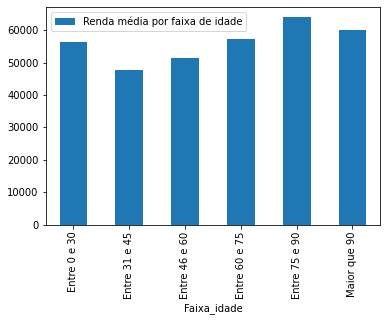

In [ ]:
df.groupby(F.col('Faixa_idade')).agg(F.format_number(F.avg("Renda"),2).alias("Renda média por faixa de idade")).orderBy(F.col("Faixa_idade").asc()).show()
df.groupby(F.col('Faixa_idade')).agg(F.mean("Renda").alias("Renda média por faixa de idade")).orderBy(F.col("Faixa_idade").asc()).toPandas().plot.bar(x='Faixa_idade')

+-------------+------------------------------+
|  Faixa_idade|Total gasto por faixa de idade|
+-------------+------------------------------+
| Entre 0 e 30|                        828.00|
|Entre 31 e 45|                        532.27|
|Entre 46 e 60|                        569.21|
|Entre 60 e 75|                        699.73|
|Entre 75 e 90|                        968.00|
| Maior que 90|                        646.67|
+-------------+------------------------------+



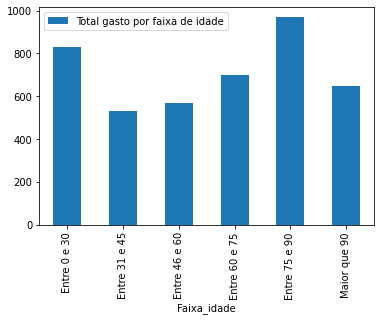

In [ ]:
df.groupby(F.col('Faixa_idade')).agg(F.mean("Total_Gasto").alias("Total gasto por faixa de idade")).orderBy(F.col("Faixa_idade").asc()).toPandas().plot.bar(x='Faixa_idade')
df.groupby(F.col('Faixa_idade')).agg(F.format_number(F.mean("Total_Gasto"),2).alias("Total gasto por faixa de idade")).orderBy(F.col("Faixa_idade").asc()).show()

## Faixa gasto

+-----------------+---------------------------------------+
|Faixa_qtd_compras|Renda média por faixa de QTD de compras|
+-----------------+---------------------------------------+
|    Entre 00 e 08|                              33,732.46|
|    Entre 09 e 16|                              47,856.15|
|    Entre 17 e 24|                              66,392.86|
|    Entre 25 e 32|                              67,936.36|
|    Entre 33 e 40|                              74,581.73|
|     Maior que 40|                              81,625.00|
+-----------------+---------------------------------------+



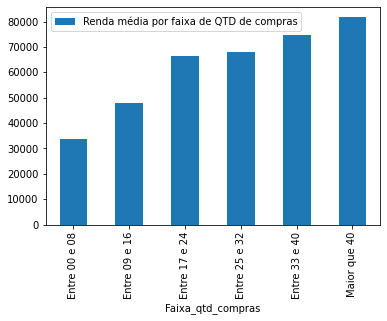

In [ ]:
df.groupby(F.col('Faixa_qtd_compras')).agg(F.format_number(F.avg("Renda"),2).alias("Renda média por faixa de QTD de compras")).orderBy(F.col("Faixa_qtd_compras").asc()).show()
df.groupby(F.col('Faixa_qtd_compras')).agg(F.mean("Renda").alias("Renda média por faixa de QTD de compras")).orderBy(F.col("Faixa_qtd_compras").asc()).toPandas().plot.bar(x='Faixa_qtd_compras')

+-----------------+-------------------------------+
|Faixa_total_gasto|Renda média por faixa de gastos|
+-----------------+-------------------------------+
|    Entre 0 e 100|                      32,829.18|
|Entre 1001 e 1500|                      71,323.60|
|  Entre 101 e 500|                      45,507.77|
|Entre 1501 e 2000|                      78,169.25|
| Entre 501 e 1000|                      62,522.70|
|   Maior que 2000|                      83,039.34|
+-----------------+-------------------------------+



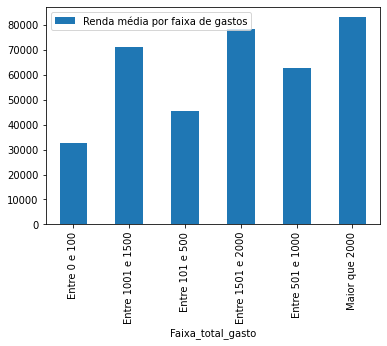

In [ ]:
df.groupby(F.col('Faixa_total_gasto')).agg(F.format_number(F.avg("Renda"),2).alias("Renda média por faixa de gastos")).orderBy(F.col("Faixa_total_gasto").asc()).show()
df.groupby(F.col('Faixa_total_gasto')).agg(F.mean("Renda").alias("Renda média por faixa de gastos")).orderBy(F.col("Faixa_total_gasto").asc()).toPandas().plot.bar(x='Faixa_total_gasto')

## Faixa de renda

+--------------------+-------+-----------------------------------------------+
|     Faixa_de_rendas|Familia|Media gasto de grupo familiar na faixa de renda|
+--------------------+-------+-----------------------------------------------+
|    1-Entre 0 e 5000|      1|                                           7.00|
|    1-Entre 0 e 5000|      2|                                           5.00|
|    1-Entre 0 e 5000|      3|                                       1,044.50|
|    1-Entre 0 e 5000|      4|                                           9.00|
|2-Entre 5001 e 10000|      1|                                         275.50|
|2-Entre 5001 e 10000|      2|                                          65.75|
|2-Entre 5001 e 10000|      3|                                          90.75|
|2-Entre 5001 e 10000|      4|                                          49.00|
|3-Entre 10001 e 2...|      1|                                          83.75|
|3-Entre 10001 e 2...|      2|                      

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fcb8d5710>],
      dtype=object)

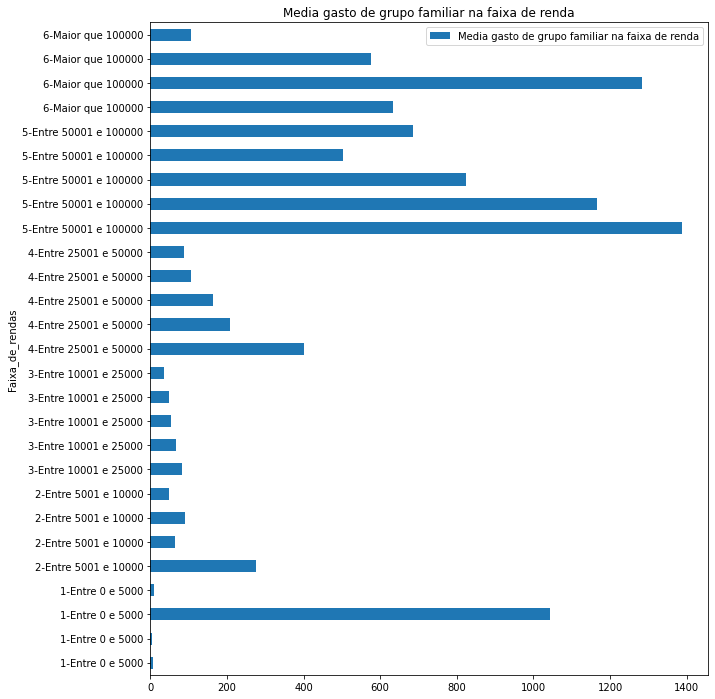

In [ ]:
df.groupby(F.col('Faixa_de_rendas'),F.col('Familia')).agg(F.format_number(F.avg("Total_Gasto"),2).alias("Media gasto de grupo familiar na faixa de renda")).orderBy(F.col("Faixa_de_rendas").asc(), F.col("Familia")).show()
(df.groupby(F.col('Faixa_de_rendas'),F.col('Familia')).agg(F.mean("Total_Gasto").alias("Media gasto de grupo familiar na faixa de renda")).orderBy(F.col("Faixa_de_rendas").asc(), F.col("Familia"))
.toPandas().plot.barh(x='Faixa_de_rendas',y='Media gasto de grupo familiar na faixa de renda',subplots=True,figsize=(10,12)))


In [ ]:
df.groupby(F.col("Educacao")).agg(F.avg("Renda").alias("Renda média por nível educacional")).show()

+-------------+---------------------------------+
|     Educacao|Renda média por nível educacional|
+-------------+---------------------------------+
|Pós-graduação|                54733.14369158878|
|     Superior|                51936.31842105263|
|       Básico|                20306.25925925926|
+-------------+---------------------------------+



## Items comprados por categorias

### Escolaridade

+-------------+------------------+------------------+------------------+------------------+------------------+------------------+
|     Educacao|             Vinho|            Frutas|              Ouro|            Carnes|            Peixes|             Doces|
+-------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Pós-graduação|           373.625|20.742990654205606| 35.80607476635514| 166.3446261682243|29.050233644859812|20.634345794392523|
|     Superior|271.12932330827067| 30.49699248120301|50.169924812030075|173.65338345864663| 43.81127819548872|31.807518796992483|
|       Básico|7.2407407407407405| 11.11111111111111|22.833333333333332|11.444444444444445|17.055555555555557| 12.11111111111111|
+-------------+------------------+------------------+------------------+------------------+------------------+------------------+



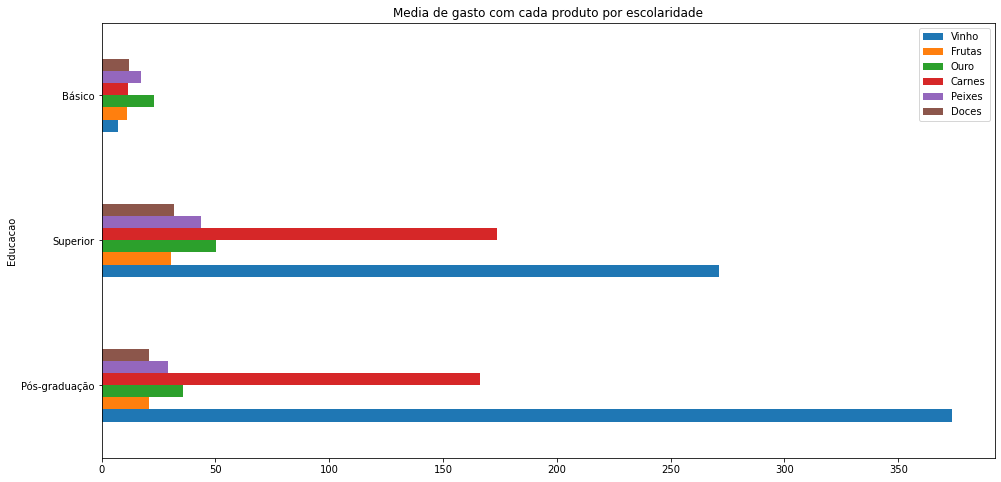

In [ ]:
df.groupby("Educacao").agg(F.avg('Vinho').alias('Vinho'),F.avg('Frutas').alias('Frutas'),F.avg('Ouro').alias('Ouro'),F.avg('Carnes').alias('Carnes'),F.avg('Peixes').alias('Peixes'), F.avg('Doces').alias('Doces')).show()
(df.groupby("Educacao").agg(F.avg('Vinho').alias('Vinho'),F.avg('Frutas').alias('Frutas'),F.avg('Ouro').alias('Ouro'),F.avg('Carnes').alias('Carnes'),F.avg('Peixes').alias('Peixes'), F.avg('Doces').alias('Doces'))
    .toPandas().plot.barh(x='Educacao',title='Media de gasto com cada produto por escolaridade',figsize=(16,8)))

Pessoas com níveis de escolaridade mais alto costumam gastar muito mais em vinhos, no nível básico é um item menos oneroso.

### Renda

+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|     Faixa_de_rendas|            Vinhos|             Ouros|            Frutas|            Carnes|            Peixes|             Doces|
+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|    1-Entre 0 e 5000|               4.5|54.333333333333336|1.3333333333333333|             290.5|               1.0|1.1666666666666667|
|2-Entre 5001 e 10000| 19.52173913043478| 41.52173913043478| 8.782608695652174|13.478260869565217| 6.434782608695652| 6.565217391304348|
|3-Entre 10001 e 2...|10.384976525821596|15.408450704225352| 5.938967136150235|15.014084507042254| 8.244131455399062| 6.446009389671362|
|4-Entre 25001 e 5...|  84.1400730816078|22.393422655298416| 7.049939098660171| 39.70158343483557|11.654080389768575|7.1863580998781975|
|5-Entre 50001 e 1...| 520.7637457044674|

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fcb024210>,
      dtype=object)

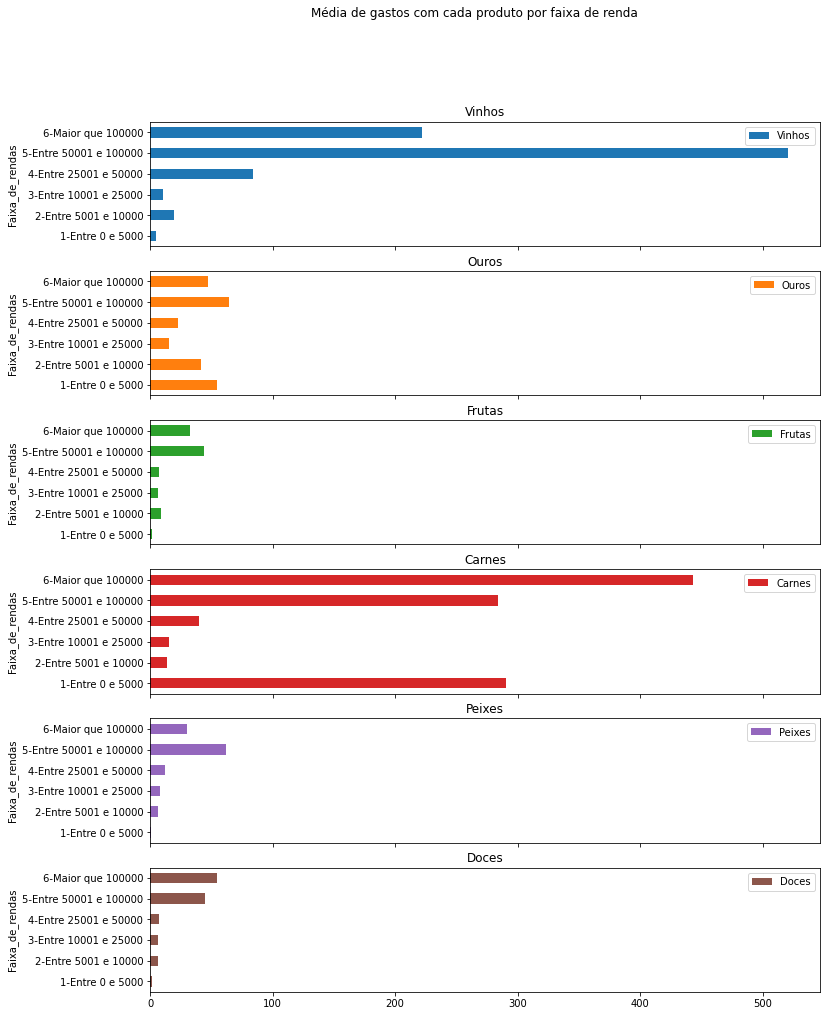

In [ ]:
vinho = F.avg("Vinho").alias("Vinhos")
ouro = F.avg("Ouro").alias("Ouros")
frutas = F.avg("Frutas").alias("Frutas")
carnes = F.avg("Carnes").alias("Carnes")
peixes = F.avg("Peixes").alias("Peixes")
doces = F.avg("Doces").alias("Doces")
df.groupby("Faixa_de_rendas").agg(vinho,ouro,frutas,carnes,peixes,doces).orderBy(F.col("Faixa_de_rendas")).show()

(df.groupby("Faixa_de_rendas").agg(vinho,ouro,frutas,carnes,peixes,doces).orderBy(F.col("Faixa_de_rendas"))
.toPandas().plot.barh(x='Faixa_de_rendas', subplots=True, title='Média de gastos com cada produto por faixa de renda',figsize=(12,16)))

### Faixa de idade

+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Faixas_ano_nascimento|            Vinhos|             Ouros|            Frutas|            Carnes|            Peixes|             Doces|
+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|        Antes de 1920| 259.3333333333333| 83.66666666666667|              50.0|191.66666666666666|39.333333333333336|22.666666666666668|
|    Entre 1921 e 1940|             144.0|               6.0|               0.0|               7.0|               0.0|               0.0|
|    Entre 1941 e 1960| 373.7886178861789|48.926829268292686|28.234146341463415| 190.1609756097561| 43.46991869918699|29.891056910569105|
|    Entre 1961 e 1980|285.22087378640776| 41.80339805825243|24.583333333333332|149.87540453074433|33.797734627831716| 25.25728155339806|
|    Entre 1981 e 2000| 253.197402

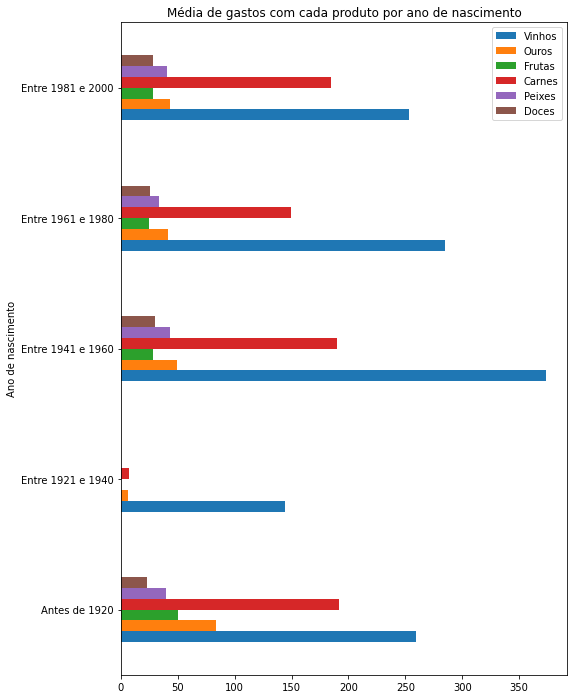

In [ ]:
vinho = F.avg("Vinho").alias("Vinhos")
ouro = F.avg("Ouro").alias("Ouros")
frutas = F.avg("Frutas").alias("Frutas")
carnes = F.avg("Carnes").alias("Carnes")
peixes = F.avg("Peixes").alias("Peixes")
doces = F.avg("Doces").alias("Doces")

df.groupby("Faixas_ano_nascimento").agg(vinho,ouro,frutas,carnes,peixes,doces).orderBy(F.col("Faixas_ano_nascimento")).show()

(df.groupby("Faixas_ano_nascimento").agg(vinho,ouro,frutas,carnes,peixes,doces).orderBy(F.col("Faixas_ano_nascimento"))
.toPandas().plot.barh(x='Faixas_ano_nascimento', xlabel='Ano de nascimento', title='Média de gastos com cada produto por ano de nascimento',figsize=(8,12)))

## Clientes com mais gastos por escolaridade

particionando os dados sob a janela de educação

In [ ]:
window = Window.partitionBy(F.col('Educacao')).orderBy(F.desc('Total_Gasto'))

filtros para melhor visualização

In [ ]:
basico = F.col('Educacao') == 'Básico'
superior = F.col('Educacao') == 'Superior'
pos = F.col('Educacao') == 'Pós-graduação'

novas tabelas mostrando quais deles gastam mais em cada categoria educacional

In [ ]:
basico_rank = df.filter(basico).withColumn('Rank', F.dense_rank().over(window)).select('Rank','ID','Total_Gasto').orderBy(F.desc('Total_Gasto')).show()


+----+-----+-----------+
|Rank|   ID|Total_Gasto|
+----+-----+-----------+
|   1| 1951|        839|
|   2| 5043|        434|
|   3| 8151|        263|
|   4| 4136|        119|
|   5| 7620|        106|
|   6|  642|        103|
|   6| 7349|        103|
|   7|  954|        102|
|   7| 4669|        102|
|   8|10395|        101|
|   9|  524|         96|
|   9|  880|         96|
|  10| 3839|         88|
|  11| 3628|         80|
|  11| 9733|         80|
|  11| 8462|         80|
|  12| 5802|         75|
|  12| 8686|         75|
|  13| 1777|         74|
|  14|11187|         69|
+----+-----+-----------+
only showing top 20 rows



In [ ]:
superior_rank = df.filter(superior).withColumn('Rank', F.dense_rank().over(window)).select('Rank','ID','Total_Gasto').orderBy(F.desc('Total_Gasto')).show()


+----+-----+-----------+
|Rank|   ID|Total_Gasto|
+----+-----+-----------+
|   1| 1763|       2524|
|   2| 4580|       2486|
|   3|10133|       2349|
|   4| 5386|       2302|
|   4| 6024|       2302|
|   5| 1553|       2283|
|   6| 2147|       2279|
|   7| 2186|       2257|
|   8| 3334|       2211|
|   9| 7503|       2209|
|  10| 5236|       2194|
|  11|  477|       2157|
|  12| 7274|       2153|
|  13| 3698|       2130|
|  14| 6421|       2116|
|  15|  313|       2088|
|  16| 4910|       2074|
|  17| 4947|       2059|
|  18| 3139|       2052|
|  19|  697|       2047|
+----+-----+-----------+
only showing top 20 rows



In [ ]:
pos_rank = df.filter(pos).withColumn('Rank', F.dense_rank().over(window)).select('Rank','ID','Total_Gasto').orderBy(F.desc('Total_Gasto')).show()


+----+----+-----------+
|Rank|  ID|Total_Gasto|
+----+----+-----------+
|   1|5735|       2525|
|   1|5350|       2525|
|   2|4475|       2440|
|   3|5453|       2352|
|   4|9010|       2346|
|   5|1173|       2252|
|   6| 737|       2231|
|   7|6248|       2217|
|   8|8867|       2126|
|   8|2747|       2126|
|   9|6932|       2119|
|  10|9826|       2114|
|  10|5830|       2114|
|  11|7919|       2092|
|  11|3403|       2092|
|  12|3690|       2091|
|  13| 203|       2089|
|  14|6072|       2087|
|  15|7627|       2086|
|  16| 821|       2077|
+----+----+-----------+
only showing top 20 rows



## Cliente estão sem comprar a muito tempo organizados por renda

Particionando em windows (janelas)

In [ ]:
window2 = Window.partitionBy(F.col('Educacao')).orderBy(F.desc('DiasDesdeUltimaCompra'),F.desc('Renda'))

filtros para melhor visualização

In [ ]:
basico = F.col('Educacao') == 'Básico'
superior = F.col('Educacao') == 'Superior'
pos = F.col('Educacao') == 'Pós-graduação'

novas tabelas mostrando os clientes com mais dias sem compra divididos sob sua categoria

In [ ]:
# Educação básica
df.where(basico).withColumn('Rank', F.dense_rank().over(window2)).select('Rank','ID','DiasDesdeUltimaCompra','Renda').orderBy('Rank').show()


+----+----+---------------------+-------+
|Rank|  ID|DiasDesdeUltimaCompra|  Renda|
+----+----+---------------------+-------+
|   1|8373|                   94|24594.0|
|   1|3829|                   94|24594.0|
|   2|3628|                   93|15038.0|
|   3|1951|                   92|34445.0|
|   4|5043|                   89|26997.0|
|   5|8700|                   86|14906.0|
|   6|5692|                   82|25443.0|
|   7| 193|                   81|14421.0|
|   8|2563|                   80|28249.0|
|   8|8312|                   80|28249.0|
|   9| 954|                   77|22123.0|
|  10|3839|                   76|15056.0|
|  11|7620|                   71|16185.0|
|  12| 642|                   69|16005.0|
|  13|1744|                   67|23529.0|
|  14|8686|                   65|23724.0|
|  15|5150|                   64|20194.0|
|  16|4136|                   63| 7500.0|
|  17| 387|                   59| 7500.0|
|  18|5181|                   58|24367.0|
+----+----+---------------------+-

In [ ]:
# Superior
df.where(superior).withColumn('Rank', F.dense_rank().over(window2)).select('Rank','ID','DiasDesdeUltimaCompra','Renda').orderBy('Rank').show()


+----+----+---------------------+-------+
|Rank|  ID|DiasDesdeUltimaCompra|  Renda|
+----+----+---------------------+-------+
|   1|9977|                   99|78901.0|
|   2|2831|                   99|78416.0|
|   3|1743|                   99|69719.0|
|   4| 528|                   99|65819.0|
|   5|2415|                   99|62568.0|
|   6|  22|                   99|46310.0|
|   7| 868|                   99|44794.0|
|   7|7212|                   99|44794.0|
|   8|8595|                   99|42429.0|
|   8|7232|                   99|42429.0|
|   9|7947|                   99|42231.0|
|  10|7829|                   99|36640.0|
|  11|5263|                   99|31056.0|
|  12|3363|                   99|20130.0|
|  12|2106|                   99|20130.0|
|  13|9757|                   98|84906.0|
|  13|2088|                   98|84906.0|
|  14|4974|                   98|83273.0|
|  15|5687|                   98|81702.0|
|  16| 313|                   98|73455.0|
+----+----+---------------------+-

In [ ]:
# Pós-graduação
df.where(pos).withColumn('Rank', F.dense_rank().over(window2)).select('Rank','ID','DiasDesdeUltimaCompra','Renda').orderBy('Rank').show()


+----+-----+---------------------+--------+
|Rank|   ID|DiasDesdeUltimaCompra|   Renda|
+----+-----+---------------------+--------+
|   1| 4070|                   99| 94871.0|
|   2|10142|                   99| 66476.0|
|   3| 8475|                   98|157243.0|
|   4| 3979|                   98| 90687.0|
|   5| 6722|                   98| 70421.0|
|   6| 5602|                   98| 66973.0|
|   7| 8070|                   98| 54222.0|
|   8| 5675|                   98| 50611.0|
|   8| 7230|                   98| 50611.0|
|   9| 9706|                   98| 31560.0|
|  10| 5871|                   98| 24401.0|
|  11|  213|                   98| 23091.0|
|  12| 5153|                   97| 77766.0|
|  12| 4127|                   97| 77766.0|
|  13| 5441|                   97| 54111.0|
|  14| 9925|                   97| 39665.0|
|  15| 1663|                   97| 34043.0|
|  16| 7527|                   97| 23748.0|
|  17| 9826|                   96| 86857.0|
|  17| 5830|                   9

# SQL
Utilizar no minimo 5 consultas diferentes utilizando o SparkSQL, comentando o porquê de ter escolhido essas funções e explicando o que cada consulta faz.

## CRIAÇÃO DA TABELA

In [ ]:
df.createOrReplaceTempView('marketing')

In [ ]:
spark.sql("SELECT * FROM marketing").show()

+----+-------------+-------------+-------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+-------+-----------+-----------------+--------------------+-----+-------------+---------------------+-----------+-----------------+
|  ID|AnoNascimento|     Educacao|  Renda|DataCadastro|DiasDesdeUltimaCompra|Vinho|Frutas|Carnes|Peixes|Doces|Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|Familia|Total_Gasto|Faixa_total_gasto|     Faixa_de_rendas|idade|  Faixa_idade|Faixas_ano_nascimento|QTD_COMPRAS|Faixa_qtd_compras|
+----+-------------+-------------+-------+------------+---------------------+-----+------+------+-

## `SELECT * FROM marketing WHERE QTD_COMPRAS > 10 AND Reclamou = true AND DiasDesdeUltimaCompra > 30`


Buscando clientes que reclamaram, tem um considerável volume de compras no passado e está já a algum tempo sem comprar. Pode haver algum haver algum problema que afastou o cliente. Bom para time de vendas agir.

In [ ]:
spark.sql('''
SELECT * FROM marketing WHERE QTD_COMPRAS > 10 AND Reclamou = true AND DiasDesdeUltimaCompra > 30
''').show()


+----+-------------+-------------+-------+------------+---------------------+-----+------+------+------+-----+----+---------------------+----------------+------------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------+---------------------+-------+-----------+-----------------+--------------------+-----+-------------+---------------------+-----------+-----------------+
|  ID|AnoNascimento|     Educacao|  Renda|DataCadastro|DiasDesdeUltimaCompra|Vinho|Frutas|Carnes|Peixes|Doces|Ouro|NumComprasComDesconto|NumComprasOnline|NumComprasCatalogo|NumComprasLoja|NumVisitasSite|AceitouCampanha3|AceitouCampanha4|AceitouCampanha5|AceitouCampanha1|AceitouCampanha2|Reclamou|AceitouUltimaCampanha|Familia|Total_Gasto|Faixa_total_gasto|     Faixa_de_rendas|idade|  Faixa_idade|Faixas_ano_nascimento|QTD_COMPRAS|Faixa_qtd_compras|
+----+-------------+-------------+-------+------------+---------------------+-----+------+------+-

## `SELECT Faixas_ano_nascimento, ROUND(MEAN(Vinho),2) media_gasto_vinho FROM marketing WHERE QTD_COMPRAS > 5 GROUP BY Faixas_ano_nascimento`

Buscar a media de gastos de vinho por faixa de ano de nascimento onde tenham comprado pelo menos 5 produtos

In [ ]:
spark.sql('''
SELECT Faixas_ano_nascimento, ROUND(AVG(Vinho),2) media_gasto_vinho FROM marketing WHERE QTD_COMPRAS > 5 GROUP BY Faixas_ano_nascimento ORDER BY Faixas_ano_nascimento ASC 
''').show(100)



+---------------------+-----------------+
|Faixas_ano_nascimento|media_gasto_vinho|
+---------------------+-----------------+
|        Antes de 1920|            385.0|
|    Entre 1921 e 1940|            144.0|
|    Entre 1941 e 1960|           411.85|
|    Entre 1961 e 1980|           323.94|
|    Entre 1981 e 2000|           308.54|
+---------------------+-----------------+



## Buscando a quantidade media de compras que cada faixa de renda faz em cada uma dos modelos de vendas

agrupando por faixa de renda atraves de `group by`, calculando a media por `avg` para pegar a media e `CEILING` para arredondar para um menor inteiro.

In [ ]:
spark.sql('''
SELECT Faixa_de_rendas, CEILING(AVG(NumComprasOnline)) AS MediaComprasOnline, 
CEILING(AVG(NumComprasCatalogo)) MediaComprasCatalogo, CEILING(AVG(NumComprasLoja)) MediaComprasLoja 
FROM marketing GROUP BY Faixa_de_rendas ORDER BY Faixa_de_rendas ASC
''').show(100)

+--------------------+------------------+--------------------+----------------+
|     Faixa_de_rendas|MediaComprasOnline|MediaComprasCatalogo|MediaComprasLoja|
+--------------------+------------------+--------------------+----------------+
|    1-Entre 0 e 5000|                 5|                   5|               0|
|2-Entre 5001 e 10000|                 3|                   1|               3|
|3-Entre 10001 e 2...|                 2|                   1|               3|
|4-Entre 25001 e 5...|                 3|                   1|               4|
|5-Entre 50001 e 1...|                 6|                   5|               8|
|  6-Maior que 100000|                 5|                   9|               5|
+--------------------+------------------+--------------------+----------------+



## Buscando qual faixa de renda faz mais compras na loja

Gera uma tabela que soma todas as modalidades de compra e faz uma busca nessa nova tabela somando todas as compras e agrupando o resultado em faixas de rendas atraves do `group by` 

In [ ]:
spark.sql('''SELECT A.Faixa_de_rendas, SUM(A.compras) AS compras_totais FROM 
(SELECT Faixa_de_rendas, (NumComprasOnline + NumComprasCatalogo + NumComprasLoja) AS compras FROM marketing) A
GROUP BY A.Faixa_de_rendas
ORDER BY A.Faixa_de_rendas
''').show()

+--------------------+--------------+
|     Faixa_de_rendas|compras_totais|
+--------------------+--------------+
|    1-Entre 0 e 5000|            53|
|2-Entre 5001 e 10000|           127|
|3-Entre 10001 e 2...|          1102|
|4-Entre 25001 e 5...|          6062|
|5-Entre 50001 e 1...|         20512|
|  6-Maior que 100000|           227|
+--------------------+--------------+



## Buscando a quantidade de compras feita por cada cliente

Gera uma tabela que soma todas as modalidades de compra e faz uma busca nessa nova tabela somando todas as compras e agrupando o resultado pelo `ID` unico do cliente atraves do `group by`

In [ ]:
spark.sql('''SELECT A.ID, SUM(A.compras) AS compras_totais FROM
  (SELECT ID, (NumComprasOnline + NumComprasCatalogo + NumComprasLoja) AS compras FROM marketing) AS A
  GROUP BY A.ID
  ORDER BY A.ID
''').show()

+---+--------------+
| ID|compras_totais|
+---+--------------+
|  0|            16|
|  1|            17|
|  9|             7|
| 13|             4|
| 17|            24|
| 20|             7|
| 22|            12|
| 24|             7|
| 25|            19|
| 35|             7|
| 48|             8|
| 49|             4|
| 55|            18|
| 67|             6|
| 73|             3|
| 75|            14|
| 78|             4|
| 87|             5|
| 89|             6|
| 92|             7|
+---+--------------+
only showing top 20 rows

